<a href="https://colab.research.google.com/github/SAKTHIKISHORE007/csa4736/blob/main/practical%20program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

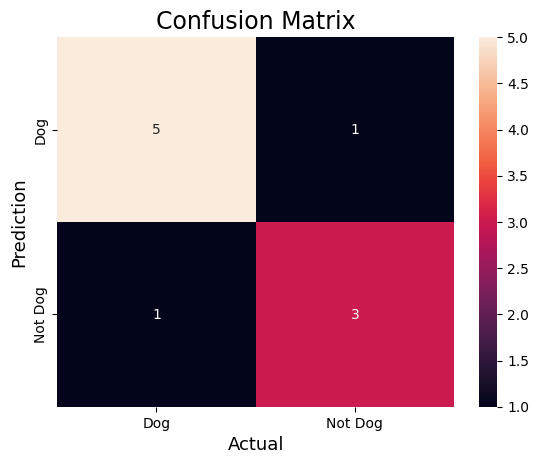

In [1]:
#1 To demonstrate confusion matrix using python
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Create the NumPy array for actual and predicted labels.
actual    = np.array(
  ['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
  ['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])

#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


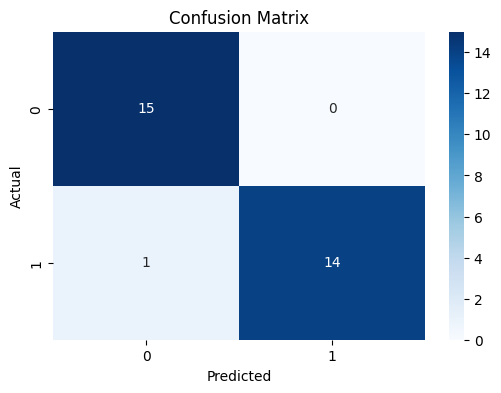

In [2]:
#2 To demonstrate  2 class confusion matrix using python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Generate simple data
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Train classifier
clf = SVC(kernel='linear')
clf.fit(X[:70], y[:70])

# Predict and get confusion matrix
y_pred = clf.predict(X[70:])
cm = confusion_matrix(y[70:], y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

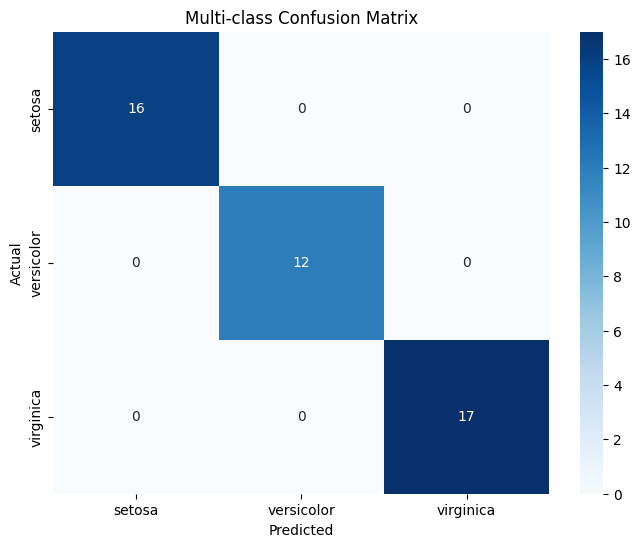

In [3]:
#3 Verifying the performance of a multi class confusion matrix by using choosen database with phython code
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Train and predict
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Multi-class Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


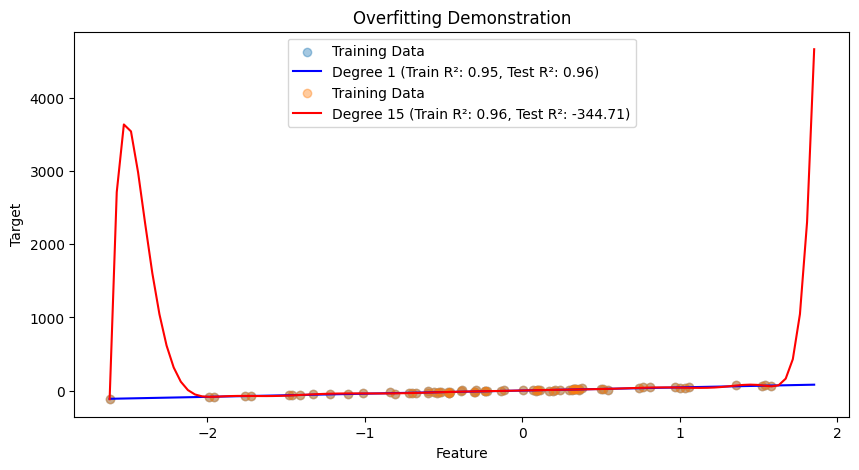

In [4]:
#4 Verifying the performance of a over fitting by using choosen database with python code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create and fit models with different polynomial degrees
degrees = [1, 15]  # Linear vs High-degree polynomial
colors = ['blue', 'red']
plt.figure(figsize=(10, 5))

for degree, color in zip(degrees, colors):
    # Transform features to polynomial
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Calculate scores
    train_score = model.score(X_poly_train, y_train)
    test_score = model.score(X_poly_test, y_test)

    # Sort for plotting
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))

    # Plot
    plt.scatter(X_train, y_train, alpha=0.4, label=f'Training Data')
    plt.plot(X_plot, y_plot, color=color,
            label=f'Degree {degree} (Train R²: {train_score:.2f}, Test R²: {test_score:.2f})')

plt.title('Overfitting Demonstration')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [5]:
#5 To demonstrate the performance of a linear regression by using choosen database with python code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load and prepare data
boston = load_boston()
X = boston.data[:, 5].reshape(-1, 1)  # Using number of rooms as feature
y = boston.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: House Prices vs Number of Rooms')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price ($1000s)')
plt.legend()

# Print metrics
print(f'R² Score: {r2_score(y_test, y_pred):.3f}')
print(f'Root MSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}')

plt.show()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'pd' is not defined

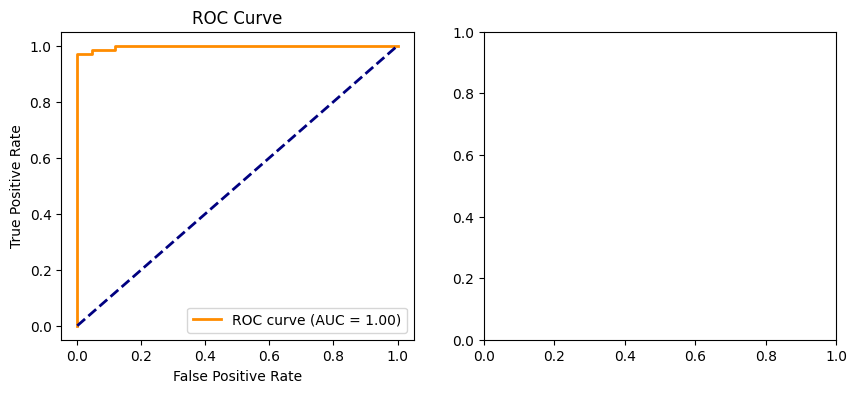

In [6]:
#6 To demonstrate  the performance of a logistic regression  by using choosen database with python code.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load and split data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predictions and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(10, 4))

# ROC Curve subplot
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Feature importance subplot
plt.subplot(1, 2, 2)
importance = pd.DataFrame({
    'Feature': load_breast_cancer().feature_names,
    'Importance': abs(model.coef_[0])
}).nlargest(10, 'Importance')
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [7]:
#7 Finding accuracy value of iris data set using KNN algorithm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and predict
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [ ]:
#8 finding accuracy value of iris data set using NAVIE BAYES algorithm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and predict using Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
#9 finding accuracy value of iris data set using  LOGISTIC  REGRESSION algorithm
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load and split data
iris = load_iris()
X = iris.data
y = iris.target

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print results
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [ ]:
#10 finding accuracy value of iris data set using DECISION TREE algorithm
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Calculate accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Print feature importance
print("\nFeature Importance:")
for feature, importance in zip(iris.feature_names, dt.feature_importances_):
    print(f"{feature}: {importance:.4f}")

In [ ]:
#11 finding accuracy value of iris data set using SVM  algorithm
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Train and predict
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f"SVM Accuracy: {accuracy:.2f}")

In [ ]:
#12 finding accuracy value of iris data set using  RANDOM FOREST algorithm
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Train and predict
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

In [ ]:
#13 To demonstrate gradient descent using python(actual data)
import numpy as np
from sklearn.datasets import make_regression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y.reshape(-1, 1)

# Initialize parameters
learning_rate = 0.01
epochs = 100
theta = np.random.randn(2, 1)

# Add bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Gradient descent
for _ in range(epochs):
    prediction = np.dot(X, theta)
    error = prediction - y
    gradient = np.dot(X.T, error) / len(X)
    theta -= learning_rate * gradient

print(f"Final parameters: {theta.flatten()}")

In [ ]:
#14 To demonstrate gradient descent using python( modified data)
import numpy as np

# Create modified data with polynomial features
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 0.5 * X**2 + 2*X + 1 + np.random.randn(100, 1) * 3

# Add polynomial feature
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))

# Initialize parameters
learning_rate = 0.0001
epochs = 100
theta = np.random.randn(3, 1)

# Gradient descent
for _ in range(epochs):
    prediction = np.dot(X_poly, theta)
    error = prediction - y
    gradient = np.dot(X_poly.T, error) / len(X)
    theta -= learning_rate * gradient

print(f"Final parameters: {theta.flatten()}")

In [ ]:
#15 Verifying the performance of a image processing  by using choosen database with phython code
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
import os

def evaluate_image_processing(image_path):
    # Read and preprocess image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply processing
    blur = cv2.GaussianBlur(img, (5,5), 0)
    edges = cv2.Canny(blur, 100, 200)

    # Calculate metrics
    mse = mean_squared_error(img.flatten(), blur.flatten())
    psnr = 10 * np.log10((255**2)/mse) if mse > 0 else float('inf')

    return psnr, len(np.where(edges > 0)[0])

# Example usage
image_path = "sample_image.jpg"  # Replace with your image path
psnr, edge_points = evaluate_image_processing(image_path)
print(f"PSNR: {psnr:.2f}, Edge Points: {edge_points}")

In [9]:
#16 Verifying the performance of a image processing  by using  water shed database with python code
import cv2
import numpy as np
from skimage.feature import peak_local_max
from scipy import ndimage

def watershed_segmentation(image_path):
    # Read and preprocess
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply watershed
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    local_max = peak_local_max(dist_transform, indices=False, min_distance=20)
    markers = ndimage.label(local_max)[0]
    labels = cv2.watershed(img, markers.astype('int32'))

    return len(np.unique(labels)) - 1  # Number of segments

# Example usage
image_path = "watershed_image.jpg"  # Replace with your image path
segments = watershed_segmentation(image_path)
print(f"Number of segments: {segments}")

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [8]:
#17 To demonstrate linear separability using python code
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate linearly separable data
np.random.seed(42)
n_samples = 100

# Create two clusters
X1 = np.random.normal(2, 1, (n_samples//2, 2))
X2 = np.random.normal(6, 1, (n_samples//2, 2))
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

# Test separability with linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)
pred = svm.predict(X)
separability = accuracy_score(y, pred)

print(f"Linear Separability Score: {separability:.2f}")

Linear Separability Score: 1.00
